In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(136429, 14)

In [7]:
X = df.drop(columns=["id", "Product ID", "Machine failure"])
Y = df[["Machine failure"]]

In [8]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [9]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [10]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

In [11]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [12]:
cat

['Type']

In [13]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [16]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [17]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [18]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0


In [19]:
# Train test split
from sklearn.model_selection import train_test_split

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.25, random_state=4)

In [21]:
xtrain.shape

(102321, 12)

In [22]:
xtest.shape

(34108, 12)

In [23]:
ytest.head()

,Machine failure
116652,0
27500,0
60327,0
35515,0
13863,0


In [24]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [26]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [27]:
type(models[1]).__name__

'DecisionTreeClassifier'

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [29]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest):
    model.fit(xtrain, ytrain)
    
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    f1_train = f1_score(ytrain, ypred_train, average="macro")
    f1_test = f1_score(ytest, ypred_test, average="macro")

    scores = cross_val_score(model, xtrain, ytrain, scoring="f1_macro", cv=5, n_jobs=-1)
    f1_cv = scores.mean()

    r = {
        "name": type(model).__name__,
        "model": model,
        "f1_train": f1_train,
        "f1_test": f1_test,
        "f1_cv": f1_cv
    }
    return r

In [30]:
def evaluate_all_models(models: list, xtrain, ytrain, xtest, ytest):
    res = []

    for model in models:
        r = evaluate_single_model(model, xtrain, ytrain, xtest, ytest)
        print(r)
        res.append(r)

    res_df = pd.DataFrame(res)
    res_df = res_df.sort_values(by="f1_cv", ascending=False).reset_index(drop=True)

    best_model = res_df.loc[0, "model"]

    return res_df, best_model   

In [31]:
res_df, best_model = evaluate_all_models(models, xtrain.values, ytrain.values, xtest.values, ytest.values)

{'name': 'LogisticRegression', 'model': LogisticRegression(), 'f1_train': 0.9281834654459258, 'f1_test': 0.9373793320217289, 'f1_cv': 0.9279141478583506}
{'name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1_train': 0.998258766062694, 'f1_test': 0.8859160383911906, 'f1_cv': 0.8733100567101945}
{'name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1_train': 0.9981010543944608, 'f1_test': 0.9361974681084793, 'f1_cv': 0.924448066683099}
{'name': 'GradientBoostingClassifier', 'model': GradientBoostingClassifier(), 'f1_train': 0.9338431409690895, 'f1_test': 0.9360084563790636, 'f1_cv': 0.9245044095796476}
{'name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=Non

In [32]:
res_df

,name,model,f1_train,f1_test,f1_cv
0,LogisticRegression,LogisticRegression(),0.928183,0.937379,0.927914
1,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.942907,0.934326,0.925511
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.933843,0.936008,0.924504
3,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.998101,0.936197,0.924448
4,DecisionTreeClassifier,DecisionTreeClassifier(),0.998259,0.885916,0.873310


In [33]:
best_model

LogisticRegression()

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

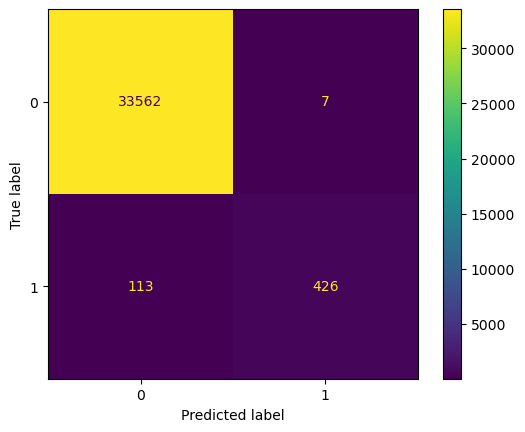

In [35]:
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [36]:
ypred_test = best_model.predict(xtest)

In [37]:
ytest.head()

,Machine failure
116652,0
27500,0
60327,0
35515,0
13863,0


In [38]:
ypred_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33569
           1       0.98      0.79      0.88       539

    accuracy                           1.00     34108
   macro avg       0.99      0.90      0.94     34108
weighted avg       1.00      1.00      1.00     34108



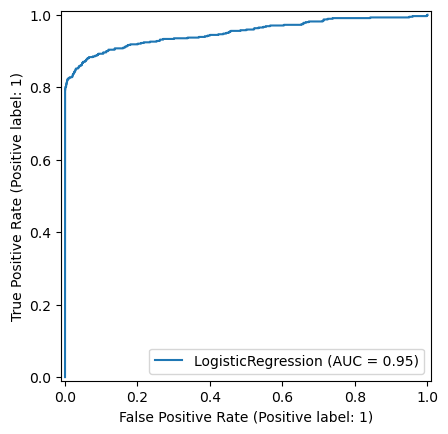

In [40]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [41]:
scores_auc = cross_val_score(best_model, xtrain, ytrain, scoring="roc_auc", cv=5, n_jobs=-1)
scores_auc

array([0.93536255, 0.92460519, 0.93387924, 0.92705209, 0.929181  ])

In [42]:
scores_auc.mean()

0.9300160140276557

In [43]:
xnew = pd.read_csv("test_machine.csv")
xnew.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


In [44]:
xnew.shape

(90954, 13)

In [46]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0


In [47]:
best_model

LogisticRegression()

In [48]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [49]:
probs = best_model.predict_proba(xnew_pre)[:, 1]
probs[0:5]

array([0.00207238, 0.00103018, 0.00259392, 0.00398829, 0.00371115])

In [50]:
res = xnew[["id"]]
res

,id
0,136429
1,136430
2,136431
3,136432
4,136433
...,...
90949,227378
90950,227379
90951,227380
90952,227381


In [51]:
res["Machine failure"] = preds
res["prob"] = probs

In [53]:
res = res.round(4)
res

,id,Machine failure,prob
0,136429,0,0.0021
1,136430,0,0.0010
2,136431,0,0.0026
3,136432,0,0.0040
4,136433,0,0.0037
...,...,...,...
90949,227378,0,0.0023
90950,227379,0,0.0005
90951,227380,0,0.0033
90952,227381,0,0.0027


In [54]:
res["Machine failure"].value_counts()

Machine failure
0    89848
1     1106
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

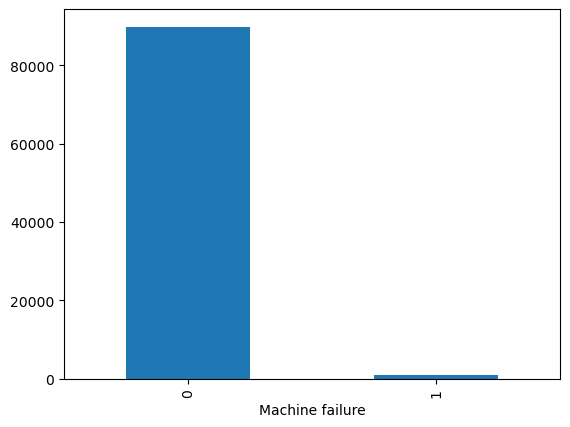

In [55]:
res["Machine failure"].value_counts().plot(kind="bar")

In [56]:
res.to_csv("Machine_failures.csv", index=False)